In [4]:
import requests
import time

def iss_location():
    website = 'http://api.open-notify.org/iss-now.json'
    response = requests.get(website)
    data = response.json()
    latitude = float(data['iss_position']['latitude'])
    longitude = float(data['iss_position']['longitude'])
    timestamp = data['timestamp']
    return latitude, longitude, timestamp

def iss_data_points(num_points):
    latitudes = []
    longitudes = []
    timestamps = []
    
    for _ in range(num_points):
        latitude, longitude, timestamp = iss_location()
        latitudes.append(latitude)
        longitudes.append(longitude)
        timestamps.append(timestamp)
        time.sleep(10)  
    
    return latitudes, longitudes, timestamps


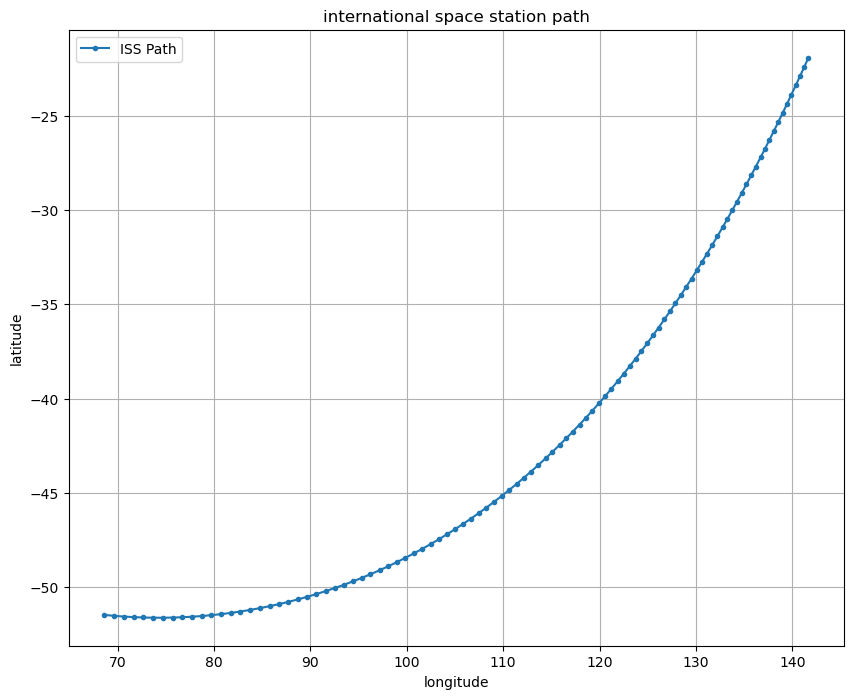

In [5]:
import matplotlib.pyplot as plt
def plot_iss_path(latitudes, longitudes):
    plt.figure(figsize=(10, 8))
    plt.plot(longitudes, latitudes, '-o', markersize=3, label='ISS Path')
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title('international space station path')
    plt.grid()
    plt.legend()
    plt.show()

if __name__ == '__main__':
    num_data_points = 100
    latitudes, longitudes, _ = iss_data_points(num_data_points)
    plot_iss_path(latitudes, longitudes)